In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stock = 'AMZN'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [5]:
price = data['Close']
price

Date
2010-01-04      6.695000
2010-01-05      6.734500
2010-01-06      6.612500
2010-01-07      6.500000
2010-01-08      6.676000
                 ...    
2023-05-12    110.260002
2023-05-15    111.199997
2023-05-16    113.400002
2023-05-17    115.500000
2023-05-18    118.150002
Name: Close, Length: 3367, dtype: float64

<Axes: xlabel='Date'>

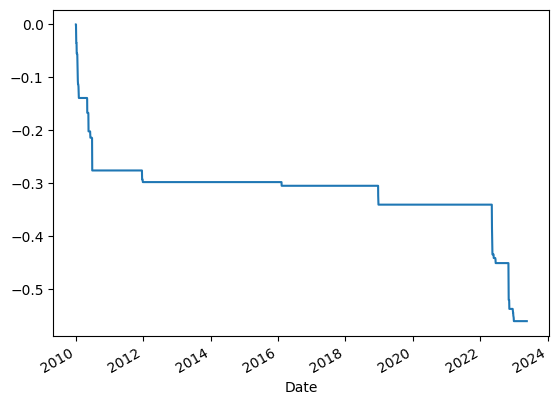

In [6]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [7]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -56.14526325328263 %


In [8]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00589989, -0.01811563, ...,  0.01978421,
        0.0185185 ,  0.02294374])

In [9]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([ 1.        ,  1.00589989,  0.98767737, ..., 16.93801324,
       17.25167992, 17.64749791])

In [10]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 1764.7497908362375%


In [11]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.038333
2012-12-31    0.449278
2013-12-31    0.589628
2014-12-31   -0.221771
2015-12-31    1.177831
2016-12-31    0.109456
2017-12-31    0.559564
2018-12-31    0.284317
2019-12-31    0.230277
2020-12-31    0.762561
2021-12-31    0.023768
2022-12-31   -0.496152
2023-12-31    0.406548
Freq: A-DEC, Name: Close, dtype: float64

In [12]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28   -0.055897
2010-03-31    0.146706
2010-04-30    0.009796
2010-05-31   -0.084902
                ...   
2023-01-31    0.227738
2023-02-28   -0.086299
2023-03-31    0.096148
2023-04-30    0.020912
2023-05-31    0.120436
Freq: M, Name: Close, Length: 161, dtype: float64

In [13]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 29.515160373186156%


In [14]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 27.6673091093068


In [15]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-02-28   -0.055897
2010-05-31   -0.084902
2010-06-30   -0.129125
2011-01-31   -0.057556
2011-08-31   -0.032761
                ...   
2022-09-30   -0.108622
2022-10-31   -0.093451
2022-11-30   -0.057595
2022-12-31   -0.129894
2023-02-28   -0.086299
Name: Close, Length: 64, dtype: float64

In [16]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 53.53223000121812
